### List files for one subject

In [2]:
import os

folder_path = '/pscratch/sd/p/pakmasha/ENIGMA_unzip/Amsterdam_AMC/halfpipe/sub-101/func'  # Update with your folder path
files = os.listdir(folder_path)
print(files)

['sub-101_task-rsfMRI_run-3_feature-seedCorr_seed-lAmygdala_stat-variance_statmap.nii.gz', 'sub-101_task-rsfMRI_run-3_feature-seedCorr_seed-rDorsalnexus_stat-variance_statmap.nii.gz', 'sub-101_task-rsfMRI_run-3_feature-seedCorr2_seed-rDorsalnexus_stat-effect_statmap.nii.gz', 'sub-101_task-rsfMRI_run-3_feature-dualReg_map-fINDIca_component-09_stat-effect_statmap.json', 'sub-101_task-rsfMRI_run-3_feature-seedCorr1_seed-lDACC_mask.nii.gz', 'sub-101_task-rsfMRI_run-3_feature-seedCorr2_seed-lFusiform_stat-z_statmap.nii.gz', 'sub-101_task-rsfMRI_run-3_feature-seedCorr_seed-lSupramarginal_stat-variance_statmap.nii.gz', 'sub-101_task-rsfMRI_run-3_feature-dualReg_map-fINDIca_component-11_stat-dof_statmap.nii.gz', 'sub-101_task-rsfMRI_run-3_feature-dualReg2_map-fINDIca_component-11_stat-z_statmap.nii.gz', 'sub-101_task-rsfMRI_run-3_feature-seedCorr2_seed-lHippocampus_stat-variance_statmap.nii.gz', 'sub-101_task-rsfMRI_run-3_feature-dualReg_map-fINDIca_component-08_stat-z_statmap.nii.gz', 'sub-10

### Examine the FC data

In [3]:
import pandas as pd

file_path = "/pscratch/sd/p/pakmasha/ENIGMA_unzip/Amsterdam_AMC/halfpipe/sub-101/func/sub-101_task-rsfMRI_run-3_feature-corrMatrix2_atlas-schaefer2011CombinedDseg_desc-correlation_matrix.tsv"
data = pd.read_csv(file_path, sep='\t', header=None)
data.shape

/tmp/ipykernel_2004118/3240393598.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(434, 434)

In [4]:
data.head

<bound method NDFrame.head of           0         1         2         3         4         5         6    \
0    1.000000  0.691601  0.759448  0.653233  0.290772  0.591867  0.479859   
1    0.691601  1.000000  0.705035  0.689448  0.179451  0.721250  0.509183   
2    0.759448  0.705035  1.000000  0.710882  0.291149  0.655520  0.547879   
3    0.653233  0.689448  0.710882  1.000000  0.147873  0.580441  0.587803   
4    0.290772  0.179451  0.291149  0.147873  1.000000  0.404677  0.507502   
..        ...       ...       ...       ...       ...       ...       ...   
429  0.322837  0.414428  0.349403  0.488479  0.241101  0.539439  0.392404   
430       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
431  0.101526  0.115988  0.085455  0.037128  0.259686  0.168168  0.275550   
432  0.307048  0.333485  0.324169  0.350239  0.321899  0.486491  0.423770   
433  0.332372  0.435375  0.311316  0.406946  0.178342  0.506113  0.425300   

          7         8         9    ...  424  

### Converting FC data to a one-dimensional vector

In [5]:
import numpy as np

# Example connectivity matrix for one subject
fc_matrix = np.random.rand(4, 4)  # replace with your actual FC matrix
print(fc_matrix)

# Get indices for the upper triangle, excluding the diagonal (k=1)
upper_indices = np.triu_indices_from(fc_matrix, k=1)
print(upper_indices)

# Convert the upper triangle into a 1D vector
fc_vector = fc_matrix[upper_indices]
print(fc_vector)

print(fc_vector.shape)  # This will be a 1D array of length n*(n-1)/2


[[5.21742758e-01 3.97235065e-01 4.53780885e-01 5.60239225e-01]
 [8.27177618e-05 1.33755860e-01 8.01080929e-01 5.31784301e-02]
 [6.32834077e-01 6.64687416e-01 9.50148235e-01 2.30019818e-01]
 [3.52618648e-01 8.80295094e-01 3.90779593e-02 9.76350996e-01]]
(array([0, 0, 0, 1, 1, 2]), array([1, 2, 3, 2, 3, 3]))
[0.39723507 0.45378088 0.56023922 0.80108093 0.05317843 0.23001982]
(6,)


### Z-scaling

Data matrix (before scaling):
[[ 0.59934283 -1.22765286  0.42953771  2.40460597 -0.74683067  1.45317261
   0.31584256 -0.14651305  1.70610512 -0.89148799]
 [ 0.40731646 -1.29314595  0.34839245  1.71734395 -1.04498357  1.38754249
  -0.20256622 -0.23715053  1.61839518 -1.28246074]
 [ 0.79312975 -1.24515526  0.31350564  1.81505036 -0.80887654  1.52218452
  -0.23019872 -0.2248604   1.67987226 -1.05833875]
 [ 0.37965868 -0.82954436  0.29730056  1.88845781 -0.53549102  1.25583127
   0.04177272 -0.69193402  1.53436279 -0.96062775]
 [ 0.64769332 -1.16572634  0.27687034  2.03977926 -0.9957044   1.35603116
  -0.09212775 -0.08857555  1.86872366 -1.35260803]]
data matrix shape: (5, 10)

Data matrix (after scaling):
[[ 0.21958192 -0.45309987  1.79902563  1.79754056  0.43433825  0.64687462
   1.75344245  0.61348945  0.22230647  1.21150504]
 [-1.0237024  -0.84662508  0.28494255 -1.06506407 -1.19362901 -0.0823303
  -0.84891959  0.18997214 -0.56988602 -0.96509969]
 [ 1.47426503 -0.55826571 -0.36600784 

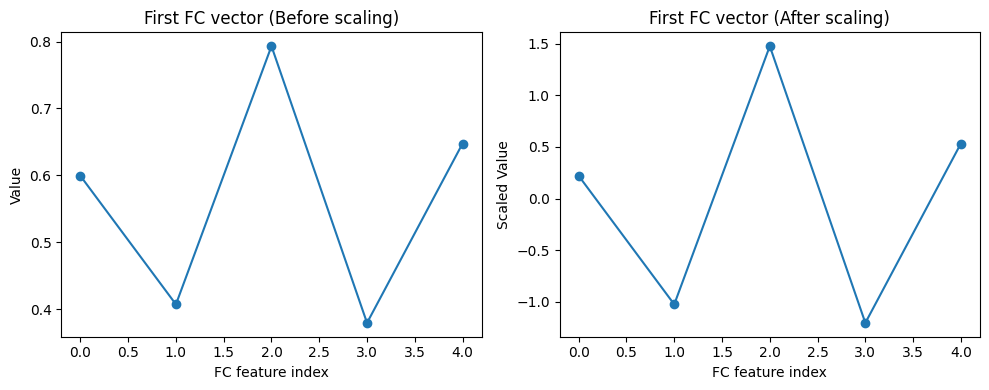

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Simulate a toy fc_vector for one subject (for example, length 10)
fc_vector = np.array([0.5, -1.2, 0.3, 2.1, -0.7, 1.5, 0.0, -0.3, 1.8, -1.0])

# Create a data matrix for 5 subjects by simulating small variations around the fc_vector.
# For example, we add random noise to the original fc_vector for each subject.
np.random.seed(42)
n_subjects = 5
fc_vector_length = fc_vector.shape[0]
data_matrix = np.array([fc_vector + np.random.normal(0, 0.2, fc_vector_length) 
                        for _ in range(n_subjects)])

print("Data matrix (before scaling):")
print(data_matrix)
print(f"data matrix shape: {data_matrix.shape}")

# Apply z-scaling using StandardScaler
scaler = StandardScaler()
data_matrix_scaled = scaler.fit_transform(data_matrix)

print("\nData matrix (after scaling):")
print(data_matrix_scaled)
print(f"data matrix shape: {data_matrix.shape}")

# Visualize the first FC vector (first column) before and after scaling.
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(data_matrix[:,0], marker='o', linestyle='-')
plt.title("First FC vector (Before scaling)")
plt.xlabel("FC feature index")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.plot(data_matrix_scaled[:,0], marker='o', linestyle='-')
plt.title("First FC vector (After scaling)")
plt.xlabel("FC feature index")
plt.ylabel("Scaled Value")

plt.tight_layout()
plt.show()


### Prepare FC data for all subjects

##### Load ROI indices that should be removed

In [23]:
import pickle

# Load the list from the pickle file
with open('columns_to_remove.pkl', 'rb') as f:
    columns_to_remove = pickle.load(f)

print("List loaded successfully!")
print(columns_to_remove)

List loaded successfully!
[2, 4, 6, 8, 10, 22, 26, 37, 39, 41, 42, 59, 61, 70, 71, 79, 80, 99, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 122, 133, 134, 139, 149, 160, 161, 164, 166, 167, 168, 177, 178, 180, 183, 184, 191, 204, 205, 208, 210, 222, 238, 239, 240, 241, 242, 258, 259, 266, 271, 279, 280, 302, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 335, 336, 338, 346, 347, 348, 357, 367, 368, 371, 373, 375, 379, 380, 385, 388, 390, 404, 406, 407, 408, 414, 415, 416, 417, 418, 419, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433]


##### One subject example

In [37]:
import numpy as np
import pandas as pd

file_path = "/pscratch/sd/p/pakmasha/ENIGMA_unzip/NYSPI_Columbia/Pediatric/halfpipe/sub-QZVYEE/func/sub-QZVYEE_ses-15513_task-rest_run-01_feature-corrMatrix2_atlas-schaefer2011Combined_desc-correlation_matrix.tsv"
data = pd.read_csv(file_path, sep='\t', header=None)
print(data.shape)

# Get the list of all indices that are not in the 'columns_to_remove'
rows_to_keep = [i for i in range(data.shape[0]) if i not in columns_to_remove]

# Remove the rows and columns specified in 'columns_to_remove'
data_filtered = np.delete(data, columns_to_remove, axis=0)  # Remove rows
data_filtered = np.delete(data_filtered, columns_to_remove, axis=1)  # Remove columns

# Show the filtered data matrix
print("Filtered Data Matrix (after removing QC ROIs):")
print(f"\ndata_filtered shape: {data_filtered.shape}")

# To check the original row and column indices, let's create an index map
original_indices = [i for i in range(data.shape[0])]
remaining_indices = [i for i in original_indices if i not in columns_to_remove]

print("\nOriginal Indices (before removal):")
print(original_indices)

print("\nRemaining Indices (after removal):")
print(remaining_indices)

# Remove the rows and columns that were filtered out later
data_filtered = np.delete(data_filtered, [307, 317], axis=0)  # Remove rows
data_filtered = np.delete(data_filtered, [307, 317], axis=1)  # Remove columns

print(f"\ndata_filtered shape: {data_filtered.shape}")
print(data_filtered[0, :10])


(434, 434)
Filtered Data Matrix (after removing QC ROIs):

data_filtered shape: (318, 318)

Original Indices (before removal):
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 19

##### Collect data for all subjects and convert them to .npy

In [ ]:
import pandas as pd 

metadata_after_site_removal2 = pd.read_csv("/pscratch/sd/p/pakmasha/ENIGMA_OCD_MBBN_git/ENIGMA_OCD_MBBN/MBBN-main/data/metadata/ENIGMA_QC_final_subject_list.csv")
print(metadata_after_site_removal2.head())
print(metadata_after_site_removal2.shape)

           Sample     Subject ID Formatted ID                  Unique_ID  OCD  \
0  Amsterdam-VUmc  sub-916002      sub-916002  Amsterdam-VUmc_sub-916002    1   
1  Amsterdam-VUmc  sub-916005      sub-916005  Amsterdam-VUmc_sub-916005    2   
2  Amsterdam-VUmc  sub-916006      sub-916006  Amsterdam-VUmc_sub-916006    1   
3  Amsterdam-VUmc  sub-916007      sub-916007  Amsterdam-VUmc_sub-916007    2   
4  Amsterdam-VUmc  sub-916008      sub-916008  Amsterdam-VUmc_sub-916008    1   

   Age of onset  Medication  Y-BOCS   Age  Age range  ...  Education  \
0           1.0         2.0    24.0  22.0          3  ...       11.0   
1           NaN         1.0     NaN  27.0          3  ...        9.0   
2           2.0         2.0    15.0  21.0          3  ...       11.0   
3           NaN         2.0     NaN  28.0          3  ...       11.0   
4           1.0         2.0    29.0  35.0          3  ...       11.0   

   Depression current  Depression lifetime  Anxiety current  Anxiety lifetime  \

In [32]:
metadata_after_site_removal2 = metadata_after_site_removal2[metadata_after_site_removal2['Unique_ID'] != 'Vancouver-BCCHR_sub-032']
print(metadata_after_site_removal2.shape)

(2094, 21)


In [ ]:
import os
import shutil
import pandas as pd

# Define the base directories
base_dir = "/pscratch/sd/p/pakmasha/ENIGMA_unzip"
output_dir = "/pscratch/sd/p/pakmasha/MBBN_data_fc"

# Function to process a halfpipe folder
def process_halfpipe(halfpipe_path, sample_name, subject_prefix=""):
    
    for subject_folder in os.listdir(halfpipe_path):
        subject_path = os.path.join(halfpipe_path, subject_folder)
        
        # Navigate to the "func" folder inside the subject folder
        func_path = os.path.join(subject_path, "func")
        
        if os.path.exists(func_path):
            
            # Search for the desired TSV file
            for file_name in os.listdir(func_path):
                
                if "corrMatrix2_atlas-schaefer2011" in file_name and file_name.endswith("correlation_matrix.tsv"):
                    file_path = os.path.join(func_path, file_name)

                    # Replace "_" with "-" in sample and subject names
                    sanitized_sample_name = sample_name.replace("_", "-")
                    sanitized_sample_name = sanitized_sample_name.replace("/", "-")
                    sanitized_subject_name = subject_folder.replace("_", "-")

                    # Combine sample, subsample (if exists), and subject for folder name
                    subject_folder_name = f"{sanitized_sample_name}_{sanitized_subject_name}"
                    subject_subdir = os.path.join(output_dir, subject_folder_name)
                    
                    # Check if the subject is present in the final meta-data
                    if subject_folder_name in metadata_after_site_removal2['Unique_ID'].values:
                        
                        os.makedirs(subject_subdir, exist_ok=True)
                    
                        # Load the file and remove specified columns
                        try:
                            data = pd.read_csv(file_path, sep='\t', header=None)

                            # Remove the rows and columns specified in 'columns_to_remove'
                            data_filtered = np.delete(data, columns_to_remove, axis=0)  # Remove rows
                            data_filtered = np.delete(data_filtered, columns_to_remove, axis=1)  # Remove columns

                            # Remove the rows and columns that were filtered out later
                            data_filtered = np.delete(data_filtered, [307, 317], axis=0)  # Remove rows
                            data_filtered = np.delete(data_filtered, [307, 317], axis=1)  # Remove columns

                            # Save the modified file to the output directory
                            output_file_name = f"{subject_folder_name}.npy"
                            output_file_path = os.path.join(subject_subdir, output_file_name)
                            np.save(output_file_path, data_filtered)

                            print(f"Processed and copied: {file_path} to {output_file_path}")
                            
                        except Exception as e:
                            print(f"Error processing file {file_path}: {e}")
                            
                    else:
                        print(f"Subject {subject_folder_name} is not in the final meta-data")

                        
# Traverse through sample folders
for sample_folder in os.listdir(base_dir):
    print(sample_folder)
    sample_path = os.path.join(base_dir, sample_folder)
    
    if os.path.isdir(sample_path):
        # Check if this is a direct sample folder with a "halfpipe" folder
        halfpipe_path = os.path.join(sample_path, "halfpipe")
        
        if os.path.exists(halfpipe_path):
            # Process this sample folder
            process_halfpipe(halfpipe_path, sample_folder)
            
        else:
            
            # If no "halfpipe", assume subsample folders exist
            for subsample_folder in os.listdir(sample_path):
                subsample_path = os.path.join(sample_path, subsample_folder)
                
                if os.path.isdir(subsample_path):
                    # Check if the subsample contains a "halfpipe" folder
                    halfpipe_path = os.path.join(subsample_path, "halfpipe")
                    
                    if os.path.exists(halfpipe_path):
                        # Combine sample and subsample names
                        combined_name = f"{sample_folder}/{subsample_folder}"
                        process_halfpipe(halfpipe_path, combined_name)


Vancouver_BCCHR
Processed and copied: /pscratch/sd/p/pakmasha/ENIGMA_unzip/Vancouver_BCCHR/halfpipe/sub-054/func/sub-054_task-rest_feature-corrMatrix2_atlas-schaefer2011CombinedDseg_desc-correlation_matrix.tsv to /pscratch/sd/p/pakmasha/MBBN_data_fc/Vancouver-BCCHR_sub-054/Vancouver-BCCHR_sub-054.npy
Processed and copied: /pscratch/sd/p/pakmasha/ENIGMA_unzip/Vancouver_BCCHR/halfpipe/sub-052/func/sub-052_task-rest_feature-corrMatrix2_atlas-schaefer2011CombinedDseg_desc-correlation_matrix.tsv to /pscratch/sd/p/pakmasha/MBBN_data_fc/Vancouver-BCCHR_sub-052/Vancouver-BCCHR_sub-052.npy
Processed and copied: /pscratch/sd/p/pakmasha/ENIGMA_unzip/Vancouver_BCCHR/halfpipe/sub-014/func/sub-014_task-rest_feature-corrMatrix2_atlas-schaefer2011CombinedDseg_desc-correlation_matrix.tsv to /pscratch/sd/p/pakmasha/MBBN_data_fc/Vancouver-BCCHR_sub-014/Vancouver-BCCHR_sub-014.npy
Processed and copied: /pscratch/sd/p/pakmasha/ENIGMA_unzip/Vancouver_BCCHR/halfpipe/sub-062/func/sub-062_task-rest_feature-cor

Processed and copied: /pscratch/sd/p/pakmasha/ENIGMA_unzip/Vancouver_BCCHR/halfpipe/sub-047/func/sub-047_task-rest_feature-corrMatrix2_atlas-schaefer2011CombinedDseg_desc-correlation_matrix.tsv to /pscratch/sd/p/pakmasha/MBBN_data_fc/Vancouver-BCCHR_sub-047/Vancouver-BCCHR_sub-047.npy
Processed and copied: /pscratch/sd/p/pakmasha/ENIGMA_unzip/Vancouver_BCCHR/halfpipe/sub-050/func/sub-050_task-rest_feature-corrMatrix2_atlas-schaefer2011CombinedDseg_desc-correlation_matrix.tsv to /pscratch/sd/p/pakmasha/MBBN_data_fc/Vancouver-BCCHR_sub-050/Vancouver-BCCHR_sub-050.npy
Processed and copied: /pscratch/sd/p/pakmasha/ENIGMA_unzip/Vancouver_BCCHR/halfpipe/sub-049/func/sub-049_task-rest_feature-corrMatrix2_atlas-schaefer2011CombinedDseg_desc-correlation_matrix.tsv to /pscratch/sd/p/pakmasha/MBBN_data_fc/Vancouver-BCCHR_sub-049/Vancouver-BCCHR_sub-049.npy
Subject Vancouver-BCCHR_sub-041 is not in the final meta-data
Processed and copied: /pscratch/sd/p/pakmasha/ENIGMA_unzip/Vancouver_BCCHR/halfp

##### Check the copied data

In [44]:
import os

# Path to the base directory
base_dir = '/pscratch/sd/p/pakmasha/MBBN_data_fc'

# List all items in the directory and filter to keep only subfolders
subfolders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# Count the number of subfolders
num_subfolders = len(subfolders)

# Print the result
print(f"Number of subfolders in {base_dir}: {num_subfolders}")
print(f"Numer of subjects in the final meta-data: {metadata_after_site_removal2.shape[0]}")

Number of subfolders in /pscratch/sd/p/pakmasha/MBBN_data_fc: 2094
Numer of subjects in the final meta-data: 2094


In [46]:
file_path = "/pscratch/sd/p/pakmasha/MBBN_data_fc/NYSPI-Columbia-Pediatric_sub-QZVYEE/NYSPI-Columbia-Pediatric_sub-QZVYEE.npy"
data = np.load(file_path)
print(data.shape)
print(data[0, :10])

(316, 316)
[1.         0.66447873 0.52434866 0.69911588 0.21803183 0.25143429
 0.20857199 0.37390609 0.11490342 0.20511075]


##### Convert FC data to a table

In [ ]:
import os
import numpy as np
import pandas as pd

# Define the base path where the .npy files are stored
base_path = '/pscratch/sd/p/pakmasha/MBBN_data_fc'

# Count processed files
count = 0

# Initialize an empty DataFrame for storing final data
final_data = pd.DataFrame()

# Walk through all subdirectories and process .npy files
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.npy'):
            
            # Extract the Unique_ID by removing the '.npy' extension
            unique_id = file.replace('.npy', '')
            
            # Retrieve the OCD value corresponding to the current Unique_ID
            ocd_value = metadata_after_site_removal2.loc[metadata_after_site_removal2['Unique_ID'] == unique_id, 'OCD'].values[0]
            
            # Construct full path to the .npy file
            npy_file_path = os.path.join(root, file)

            # Load the .npy file into a numpy array
            data = np.load(npy_file_path)

            # Get indices for the upper triangle, excluding the diagonal (k=1)
            upper_indices = np.triu_indices_from(data, k=1)

            # Convert the upper triangle into a 1D vector (flattened)
            fc_vector = data[upper_indices]

            # Create a new row with the Unique_ID, OCD, and fc_vector
            new_row = pd.DataFrame([fc_vector], columns=[f"FC{i+1}" for i in range(len(fc_vector))])

            # Add the Unique_ID and OCD as the first two columns
            new_row.insert(0, 'Unique_ID', unique_id)
            new_row.insert(1, 'OCD', ocd_value)

            # Append the new row to the final DataFrame
            final_data = pd.concat([final_data, new_row], ignore_index=True)

            count += 1
            print(f"Processed {count} files.")

# Display the final data for verification
print(final_data.head())


Processed 1 files.
Processed 2 files.
Processed 3 files.
Processed 4 files.
Processed 5 files.
Processed 6 files.
Processed 7 files.
Processed 8 files.
Processed 9 files.
Processed 10 files.
Processed 11 files.
Processed 12 files.
Processed 13 files.
Processed 14 files.
Processed 15 files.
Processed 16 files.
Processed 17 files.
Processed 18 files.
Processed 19 files.
Processed 20 files.
Processed 21 files.
Processed 22 files.
Processed 23 files.
Processed 24 files.
Processed 25 files.
Processed 26 files.
Processed 27 files.
Processed 28 files.
Processed 29 files.
Processed 30 files.
Processed 31 files.
Processed 32 files.
Processed 33 files.
Processed 34 files.
Processed 35 files.
Processed 36 files.
Processed 37 files.
Processed 38 files.
Processed 39 files.
Processed 40 files.
Processed 41 files.
Processed 42 files.
Processed 43 files.
Processed 44 files.
Processed 45 files.
Processed 46 files.
Processed 47 files.
Processed 48 files.
Processed 49 files.
Processed 50 files.
Processed

##### Z-scaling

                                           Unique_ID  OCD       FC1       FC2  \
0                             Barcelona-HCPB_sub-008    1 -1.106648 -1.023515   
1                                 Brazil_sub-C002061    2  0.257474 -0.308071   
2  Yale-Pittinger-HCP-Prisma_sub-YaleHCPPrismapb3225    2 -0.973578 -1.521622   
3                            Seoul-SNU_sub-NOR117CSJ    2  0.699457  1.619503   
4                             Dresden_sub-GEROME3073    1  0.570423 -0.005654   

        FC3       FC4       FC5       FC6       FC7       FC8  ...   FC49761  \
0 -1.270532 -1.099626 -1.230912 -1.362202 -1.220650 -0.433668  ... -0.959006   
1  0.704710  0.382014  0.870021  0.868802 -0.657471  0.140776  ... -0.205291   
2 -0.666962  0.335876  0.425527  0.363499 -1.113257 -0.218857  ... -0.531463   
3  1.663065 -0.219720  0.422257  0.429541 -1.114043 -1.514967  ...  0.945094   
4  0.809407  1.716746  1.742363  1.199428  1.142659  0.745790  ...  1.277287   

    FC49762   FC49763   FC49764 

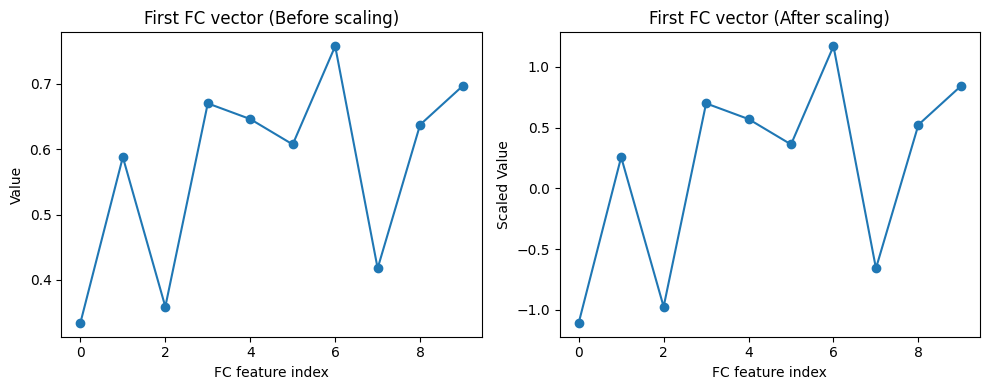

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Extract the FC data columns (starting from the third column onward)
fc_data = final_data.iloc[:, 2:]

# Apply z-scaling using StandardScaler
scaler = StandardScaler()
fc_data_scaled = scaler.fit_transform(fc_data)

# Reassemble the final data with the scaled FC data
final_data_scaled = final_data.iloc[:, :2].copy()  # Copy the first two columns (Unique_ID, OCD)
final_data_scaled = pd.concat([final_data_scaled, pd.DataFrame(fc_data_scaled, columns=fc_data.columns)], axis=1)

# Optionally, display the first few rows of the scaled data
print(final_data_scaled.head())

print("\nData matrix (after scaling):")
print(f"data matrix shape: {final_data_scaled.shape}")

# Visualize the first FC vector (first column) before and after scaling.
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(final_data.iloc[:10, 2], marker='o', linestyle='-')
plt.title("First FC vector (Before scaling)")
plt.xlabel("FC feature index")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.plot(final_data_scaled.iloc[:10, 2], marker='o', linestyle='-')
plt.title("First FC vector (After scaling)")
plt.xlabel("FC feature index")
plt.ylabel("Scaled Value")

plt.tight_layout()
plt.show()

# Optionally, save the final DataFrame to a CSV file
final_data_scaled.to_csv('/pscratch/sd/p/pakmasha/ENIGMA_OCD_MBBN_git/ENIGMA_OCD_MBBN/ENIGMA-OCD results/QC/ENIGMA_QC_FC_data.csv', index=False)

##### Check if there are any NA values in the dataframe

In [ ]:
# Check if there are any NA values in the entire dataframe
any_na = final_data_scaled.isna().any().any()

# Print the result
print("Are there any NA values in the dataframe?", any_na)

Are there any NA values in the dataframe? False
